#Dutch Students plot

In [27]:
import numpy as np
from scipy.special import factorial
from scipy.stats import poisson
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


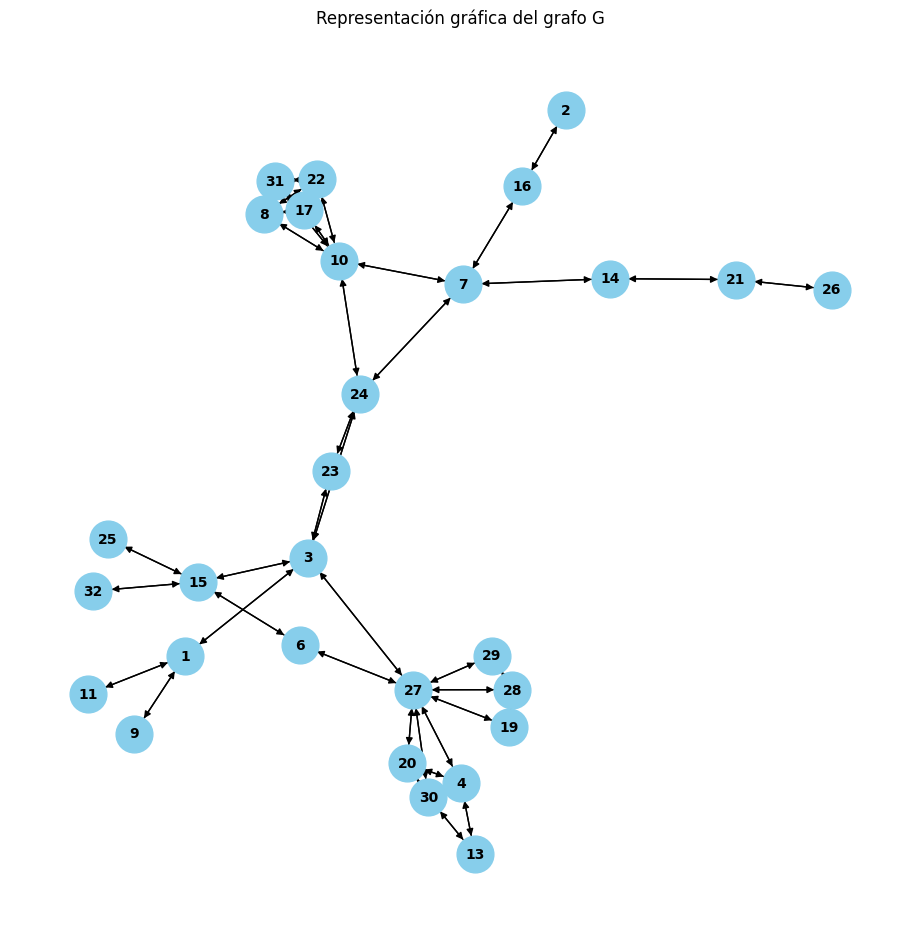

In [2]:


# Graph initialization
G = {
    1: [3, 9, 11],
    2: [16],
    3: [1, 15, 23, 24, 27],
    4: [13, 20, 27, 30],
    6: [15, 27],
    7: [10, 14, 16, 24],
    8: [10, 17, 22, 31],
    9: [1],
    10: [7, 8, 17, 22, 24, 31],
    11: [1],
    13: [4, 30],
    14: [7, 21],
    15: [3, 6, 25, 32],
    16: [2, 7],
    17: [8, 10, 22, 31],
    19: [27, 28],
    20: [4, 27, 30],
    21: [14, 26],
    22: [8, 10, 17, 31],
    23: [3, 24],
    24: [3, 7, 10, 23],
    25: [15],
    26: [21],
    27: [3, 4, 6, 19, 20, 28, 29, 30],
    28: [19, 27, 29],
    29: [27, 28],
    30: [4, 13, 20, 27],
    31: [8, 10, 17, 22],
    32: [15]
}

# Directed graph
G_nx = nx.DiGraph(G)

plt.figure(figsize=(9, 9))
pos = nx.spring_layout(G_nx)  s
nx.draw(G_nx, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Representación gráfica del grafo G")
plt.show()


#Geodesic Distant Generalized

    0.00  0.10  0.25  0.75  1.00  1.50  2.00  3.00  5.00
1    7.5   7.5   7.5   7.0   7.5   6.5   7.0   7.0   7.0
2   25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0  25.0
3    1.0   1.0   1.0   1.0   1.0   2.0   2.0   2.0   2.0
4    9.0   9.0   9.0   9.0   9.0   9.0   8.0   8.0   6.0
5   28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0
6   11.0  10.0  10.0  11.0  11.0  11.0  11.0  14.0  13.0
7    5.0   4.0   4.0   5.0   5.0   5.0   5.0   5.0   5.0
8   16.0  18.0  18.0  16.5  16.0  14.5  13.0  12.0  11.0
9   21.0  21.0  21.0  21.0  21.0  22.0  22.0  22.0  21.5
10   4.0   5.0   5.0   4.0   4.0   4.0   4.0   3.0   3.0
11  21.0  21.0  21.0  21.0  21.0  22.0  22.0  22.0  21.5
12  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0
13  24.0  24.0  24.0  24.0  24.0  24.0  24.0  24.0  24.0
14  18.0  15.0  15.0  15.0  18.0  18.0  18.0  18.0  18.0
15   7.5   7.5   7.5   8.0   7.5   6.5   6.0   6.0   8.0
16  19.0  16.0  19.0  19.0  19.0  19.0  19.0  19.0  19.0
17  16.0  18.0  16.5  16.5  16.

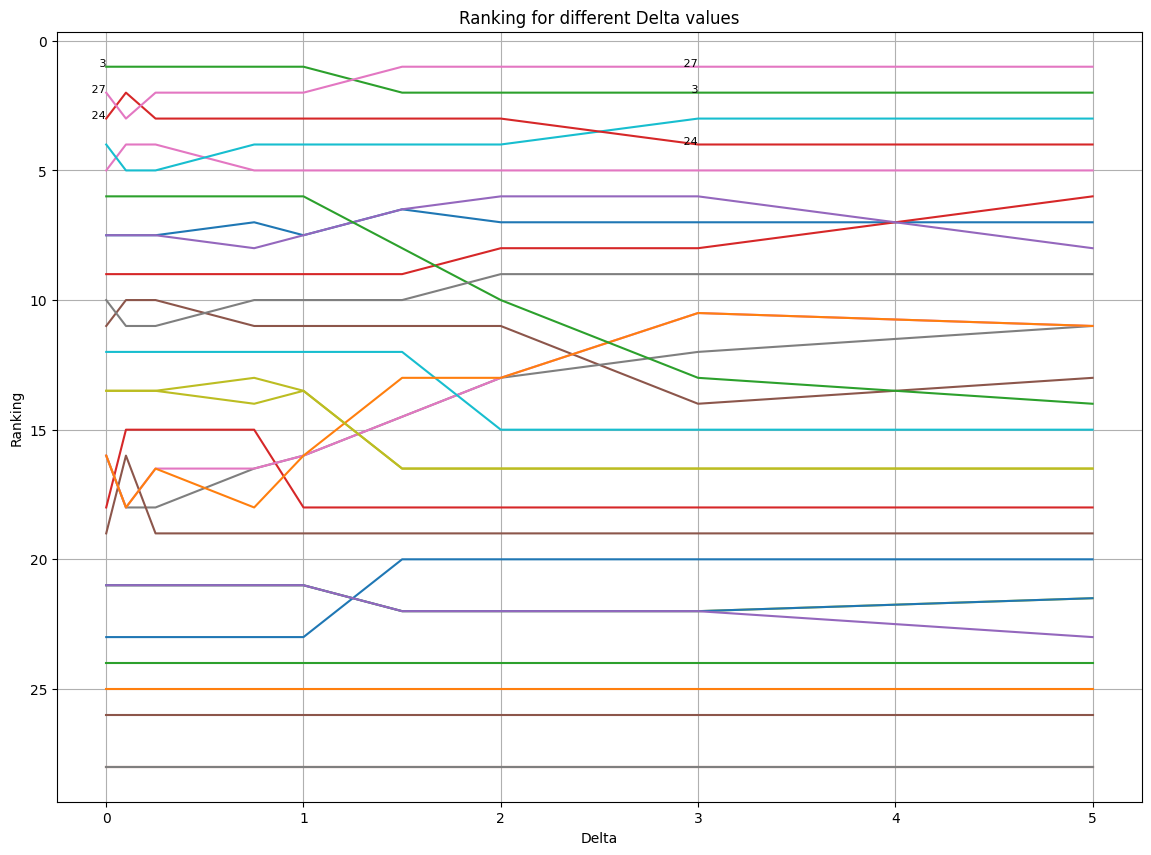

In [37]:
def closeness_centrality_delta(G, delta):
    N = len(G)
    C_delta = np.zeros(N)


    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

    for i in range(N):
        sum_dist = 0
        for j in range(N):
            if i != j:
                try:
                    g_ij = shortest_path_lengths[i+1][j+1]
                    if delta != 0:
                        sum_dist += g_ij ** -delta
                    else:
                        sum_dist += 1 / g_ij  # Delta equal 0
                except KeyError:
                    pass
        C_delta[i] = sum_dist / (N - 1)

    return C_delta


G_dict = {
    1: [3, 9, 11],
    2: [16],
    3: [1, 15, 23, 24, 27],
    4: [13, 20, 27, 30],
    6: [15, 27],
    7: [10, 14, 16, 24],
    8: [10, 17, 22, 31],
    9: [1],
    10: [7, 8, 17, 22, 24, 31],
    11: [1],
    13: [4, 30],
    14: [7, 21],
    15: [3, 6, 25, 32],
    16: [2, 7],
    17: [8, 10, 22, 31],
    19: [27, 28],
    20: [4, 27, 30],
    21: [14, 26],
    22: [8, 10, 17, 31],
    23: [3, 24],
    24: [3, 7, 10, 23],
    25: [15],
    26: [21],
    27: [3, 4, 6, 19, 20, 28, 29, 30],
    28: [19, 27, 29],
    29: [27, 28],
    30: [4, 13, 20, 27],
    31: [8, 10, 17, 22],
    32: [15]
}


G = nx.Graph(G_dict)

deltas = [0, 0.1, 0.25, 0.75, 1, 1.5, 2, 3, 5]

closeness_matrix_all_deltas = np.zeros((len(G), len(deltas)))

for i, delta in enumerate(deltas):
    closeness_matrix_all_deltas[:, i] = closeness_centrality_delta(G, delta)

closeness_matrix_all_deltas = (closeness_matrix_all_deltas - closeness_matrix_all_deltas.min(axis=0)) / (closeness_matrix_all_deltas.max(axis=0) - closeness_matrix_all_deltas.min(axis=0))

df_closeness = pd.DataFrame(closeness_matrix_all_deltas, columns=deltas, index=np.arange(1, len(G) + 1))

ranking_matrix_all_deltas = np.zeros((len(G), len(deltas)))

for i, delta in enumerate(deltas):
    ranking_matrix_all_deltas[:, i] = df_closeness.iloc[:, i].rank(ascending=False).values

df_ranking = pd.DataFrame(ranking_matrix_all_deltas, columns=deltas, index=np.arange(1, len(G) + 1))

print(df_ranking)

plt.figure(figsize=(14, 10))

for node in df_ranking.index:
    plt.plot(deltas, df_ranking.loc[node, :], marker=' ', label=f'{node}')

label_nodes = [27, 3, 24]
label_deltas = [deltas[0], deltas[-2]]
for delta in label_deltas:
    label_x = [delta] * len(label_nodes)
    label_y = df_ranking.loc[label_nodes, delta].values
    for i, node in enumerate(label_nodes):
        plt.text(label_x[i], label_y[i], f' {node}', horizontalalignment='right', fontsize=8)

plt.xlabel('Delta')
plt.ylabel('Ranking')
plt.title('Ranking for different Delta values')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


#Uniform Weights

#Ejemplo Ducth Students

In [30]:
G_dict = {
    1: [3, 9, 11],
    2: [16],
    3: [1, 15, 23, 24, 27],
    4: [13, 20, 27, 30],
    6: [15, 27],
    7: [10, 14, 16, 24],
    8: [10, 17, 22, 31],
    9: [1],
    10: [7, 8, 17, 22, 24, 31],
    11: [1],
    13: [4, 30],
    14: [7, 21],
    15: [3, 6, 25, 32],
    16: [2, 7],
    17: [8, 10, 22, 31],
    19: [27, 28],
    20: [4, 27, 30],
    21: [14, 26],
    22: [8, 10, 17, 31],
    23: [3, 24],
    24: [3, 7, 10, 23],
    25: [15],
    26: [21],
    27: [3, 4, 6, 19, 20, 28, 29, 30],
    28: [19, 27, 29],
    29: [27, 28],
    30: [4, 13, 20, 27],
    31: [8, 10, 17, 22],
    32: [15]
}

G = nx.Graph(G_dict)

# Compute centrality meassures
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
clustering_coefficient = nx.clustering(G)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)  # Aumentar el número máximo de iteraciones
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = {node: 0 for node in G.nodes()}  # Asignar 0 si no converge
node_degree = dict(G.degree())

# For specific nodes
nodes = [3, 24, 27]
metrics = {
    "Nodo": nodes,
    "Centralidad de Cercanía": [closeness_centrality.get(node, 0) for node in nodes],
    "Centralidad de Intermediación": [betweenness_centrality.get(node, 0) for node in nodes],
    "Centralidad de Valor Propio": [eigenvector_centrality.get(node, 0) for node in nodes],
    "Grado del Nodo": [node_degree.get(node, 0) for node in nodes],
    "Coeficiente de Agrupamiento": [clustering_coefficient.get(node, 0) for node in nodes]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

   Nodo  Centralidad de Cercanía  Centralidad de Intermediación  \
0     3                 0.430769                       0.642857   
1    24                 0.405797                       0.494709   
2    27                 0.368421                       0.444444   

   Centralidad de Valor Propio  Grado del Nodo  Coeficiente de Agrupamiento  
0                     0.100463               5                     0.100000  
1                     0.199890               4                     0.333333  
2                     0.086498               8                     0.178571  


<ipython-input-33-1f0be53fa70b>:35: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sum_term = sum((np.exp(-lamb * T) * (lamb * T)**i / np.math.factorial(i)) for i in range(L))


        Time 1    Time 2    Time 3    Time 4    Time 5
Node                                                  
1          NaN       NaN  0.410690  0.596235  0.731923
3     0.174108  0.417588  0.660546  0.808801  0.880468
4     0.138282  0.280371  0.407483  0.504874  0.580401
6          NaN  0.277543  0.449064  0.564963  0.641610
7     0.138291  0.310685  0.471012  0.600549  0.712863
8     0.133705       NaN       NaN       NaN       NaN
10    0.171055  0.310378  0.441961  0.573538  0.692000
15         NaN  0.274145  0.472483  0.639046  0.750416
17    0.133705       NaN       NaN       NaN       NaN
20         NaN  0.275117       NaN       NaN       NaN
22    0.133705       NaN       NaN       NaN       NaN
23         NaN       NaN  0.511610  0.716102  0.836795
24    0.153109  0.375344  0.602875  0.771179  0.875534
27    0.199962  0.376857  0.530991  0.657574  0.754431
30    0.138282  0.280371       NaN       NaN       NaN


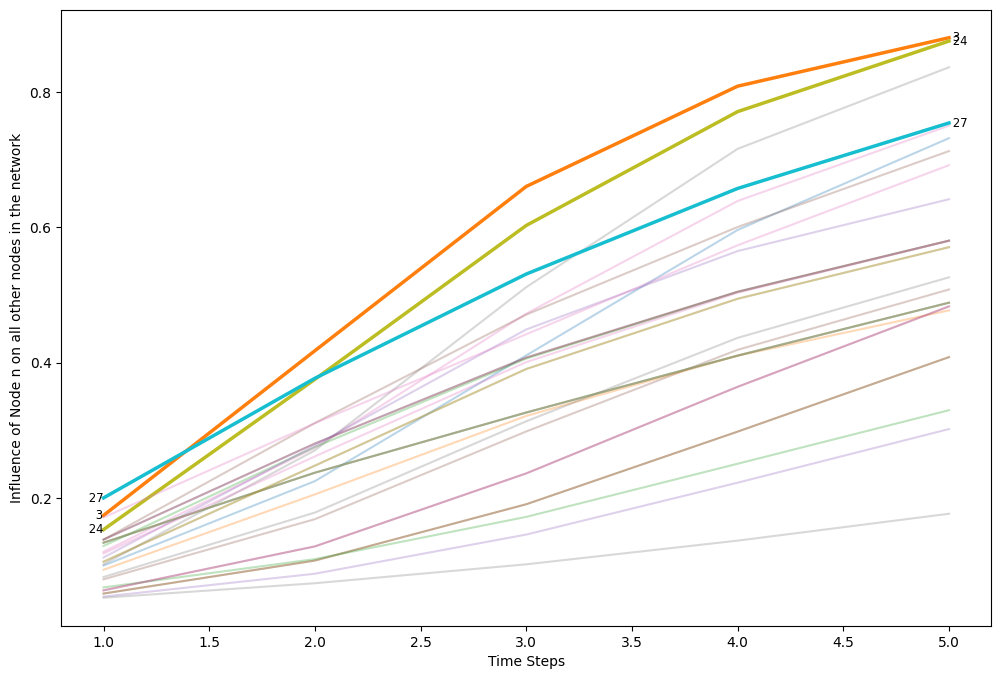

In [33]:
edges = [(1, 3), (1, 9), (1, 11), (2, 16), (3, 15), (3, 23), (3, 24), (3, 27),
         (4, 13), (4, 20), (4, 27), (4, 30), (6, 15), (6, 27), (7, 10), (7, 14),
         (7, 16), (7, 24), (8, 10), (8, 17), (8, 22), (8, 31), (9, 1), (10, 7),
         (10, 8), (10, 17), (10, 22), (10, 24), (10, 31), (11, 1), (13, 4),
         (13, 30), (14, 7), (14, 21), (15, 3), (15, 6), (15, 25), (15, 32),
         (16, 2), (16, 7), (17, 8), (17, 10), (17, 22), (17, 31), (19, 27),
         (19, 28), (20, 4), (20, 27), (20, 30), (21, 14), (21, 26), (22, 8),
         (22, 10), (22, 17), (22, 31), (23, 3), (23, 24), (24, 3), (24, 7),
         (24, 10), (24, 23), (25, 15), (26, 21), (27, 3), (27, 4), (27, 6),
         (27, 19), (27, 20), (27, 28), (27, 29), (27, 30), (28, 19), (28, 27),
         (28, 29), (29, 27), (29, 28), (30, 4), (30, 13), (30, 20), (30, 27),
         (31, 8), (31, 10), (31, 17), (31, 22), (32, 15)]

G = nx.Graph()
G.add_edges_from(edges)

Lmax = 5
lamb = 0.5
Timesteps = [1, 2, 3, 4, 5]

max_node = max(G.nodes)

num_timesteps = len(Timesteps)
Cs_t6 = np.zeros((max_node + 1, max_node + 1, num_timesteps))

for n in G.nodes:
    Cprev = np.zeros((max_node + 1, num_timesteps))

    for L in range(Lmax, -1, -1):
        Ccurr = np.zeros((max_node + 1, num_timesteps))


        model_values = []
        for T in Timesteps:
            sum_term = sum((np.exp(-lamb * T) * (lamb * T)**i / np.math.factorial(i)) for i in range(L))
            P_L_T_lambda = 1 - sum_term
            model_values.append(P_L_T_lambda)
            Ccurr[n][Timesteps.index(T)] = P_L_T_lambda

        for f in G.nodes:
            for t in G.neighbors(f):

                w = 1
                for idx, T in enumerate(Timesteps):
                    v = model_values[idx]
                    if t < len(Cprev) and f < len(Ccurr):
                        Ccurr[f][idx] += w * Cprev[t][idx] - (Ccurr[f][idx] * w * Cprev[t][idx] / v)


        Cprev = np.copy(Ccurr)


    for f in G.nodes:
        for idx, T in enumerate(Timesteps):
            Cs_t6[n][f][idx] = Ccurr[f][idx]


influence_data3 = {f'Time {t}': [Cs_t6[n][f][Timesteps.index(t)] for n in G.nodes for f in G.nodes] for t in Timesteps}
df3 = pd.DataFrame(influence_data3, index=pd.MultiIndex.from_product([G.nodes, G.nodes], names=['Node', 'Influenced Node']))


df_normalized3 = df3.div(df3.max(axis=0), axis=1)

top_10_influence3 = {f'Time {t}': df_normalized3.groupby('Node')[f'Time {t}'].mean().nlargest(10) for t in Timesteps}


top_10_table3 = pd.DataFrame(top_10_influence3)

print(top_10_table3)


plt.figure(figsize=(12, 8))
highlight_nodes = [3, 27, 24]

for node in G.nodes:
    if node in highlight_nodes:
        plt.plot(Timesteps, df_normalized3.loc[node].mean(axis=0), marker=' ', label=f'{node}', linewidth=2.5)
        plt.text(Timesteps[0], df_normalized3.loc[node].mean(axis=0)[0], f' {node}', fontsize='small', ha='right', va='center')
        plt.text(Timesteps[-1], df_normalized3.loc[node].mean(axis=0)[-1], f' {node}', fontsize='small', ha='left', va='center')
    else:
        plt.plot(Timesteps, df_normalized3.loc[node].mean(axis=0), marker=' ', alpha=0.3)

plt.xlabel('Time Steps')
plt.ylabel('Influence of Node n on all other nodes in the network')
plt.show()

In [9]:

matriz1 = np.array(Cs_t6)[:, :, 0]
matriz2 = np.array(Cs_t6)[:, :, 1]
matriz3 = np.array(Cs_t6)[:, :, 2]
matriz4 = np.array(Cs_t6)[:, :, 3]
matriz5 = np.array(Cs_t6)[:, :, 4]

In [10]:

def heatmap_from_matrix(matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, cmap='viridis', annot=False, fmt='.2f', square=True)
    plt.title('Influence Propagation')

    plt.show()

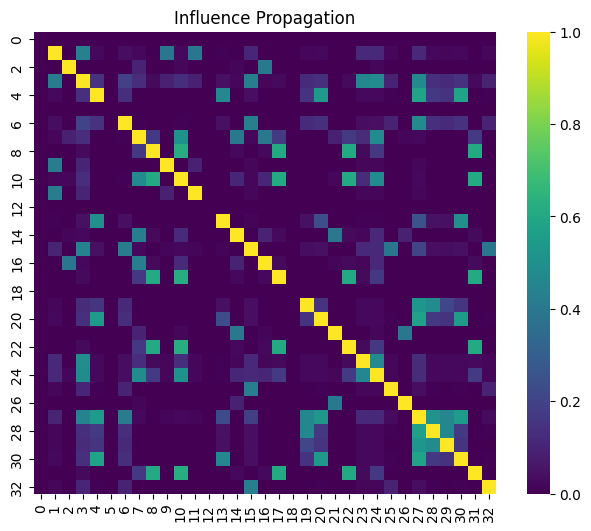

In [11]:
heatmap_from_matrix(matriz1)

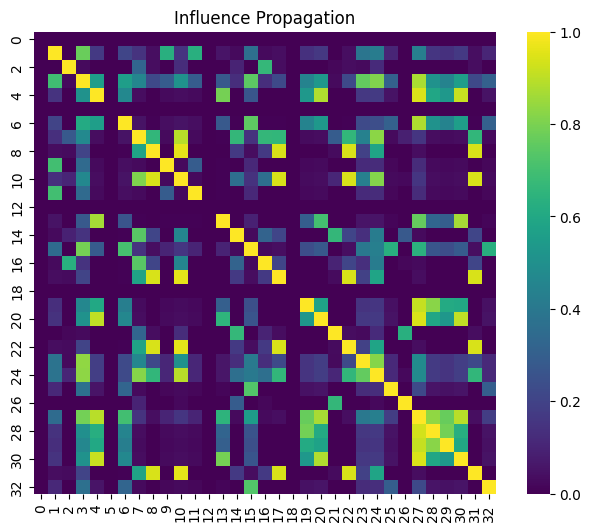

In [12]:
heatmap_from_matrix(matriz2)

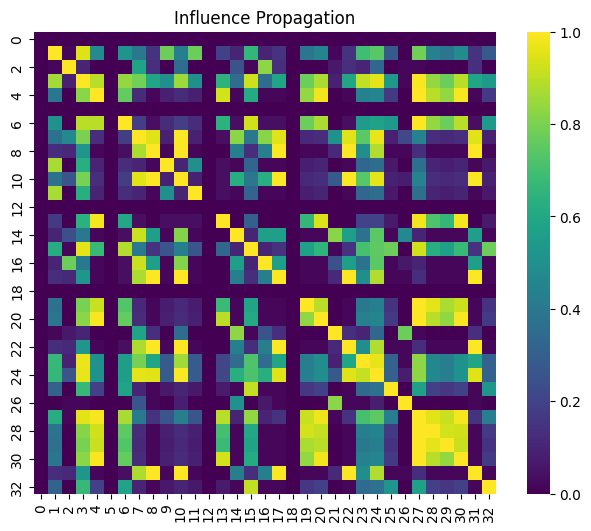

In [13]:
heatmap_from_matrix(matriz3)

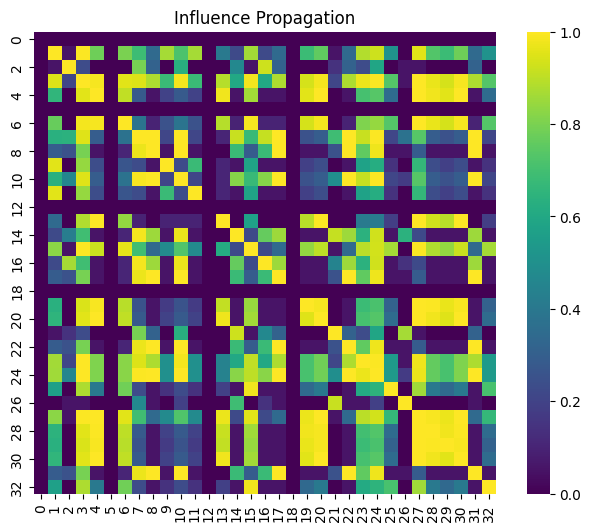

In [14]:
heatmap_from_matrix(matriz4)

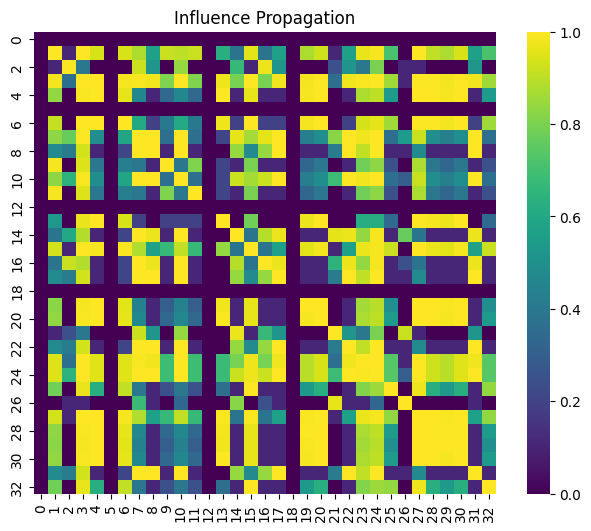

In [15]:
heatmap_from_matrix(matriz5)

# Variable Weights

## Eygen Value and Betwenness

In [34]:

edges = [(1, 3), (1, 9), (1, 11), (2, 16), (3, 15), (3, 23), (3, 24), (3, 27),
         (4, 13), (4, 20), (4, 27), (4, 30), (6, 15), (6, 27), (7, 10), (7, 14),
         (7, 16), (7, 24), (8, 10), (8, 17), (8, 22), (8, 31), (9, 1), (10, 7),
         (10, 8), (10, 17), (10, 22), (10, 24), (10, 31), (11, 1), (13, 4),
         (13, 30), (14, 7), (14, 21), (15, 3), (15, 6), (15, 25), (15, 32),
         (16, 2), (16, 7), (17, 8), (17, 10), (17, 22), (17, 31), (19, 27),
         (19, 28), (20, 4), (20, 27), (20, 30), (21, 14), (21, 26), (22, 8),
         (22, 10), (22, 17), (22, 31), (23, 3), (23, 24), (24, 3), (24, 7),
         (24, 10), (24, 23), (25, 15), (26, 21), (27, 3), (27, 4), (27, 6),
         (27, 19), (27, 20), (27, 28), (27, 29), (27, 30), (28, 19), (28, 27),
         (28, 29), (29, 27), (29, 28), (30, 4), (30, 13), (30, 20), (30, 27),
         (31, 8), (31, 10), (31, 17), (31, 22), (32, 15)]

G = nx.Graph()
G.add_edges_from(edges)

Lmax = 5
lamb = 0.5
Timesteps = [1, 2, 3, 4, 5]


betweenness = nx.betweenness_centrality(G, normalized=True)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = {node: 0 for node in G.nodes}

def normalize(metric):
    max_value = max(metric.values())
    for node in metric:
        if max_value > 0:
            metric[node] /= max_value

normalize(betweenness)

normalize(eigenvector_centrality)

max_node = max(G.nodes)
\
num_timesteps = len(Timesteps)
Cs_t5 = [[[0.0 for _ in range(num_timesteps)] for _ in range(max_node + 1)] for _ in range(max_node + 1)]

for n in G.nodes:
    Cprev = [[0.0 for _ in range(num_timesteps)] for _ in range(max_node + 1)]

    for L in range(Lmax, -1, -1):
        Ccurr = [[0.0 for _ in range(num_timesteps)] for _ in range(max_node + 1)]

        model_values = []
        for T in Timesteps:
            sum_term = sum((np.exp(-lamb * T) * (lamb * T)**i / np.math.factorial(i)) for i in range(L))
            P_L_T_lambda = 1 - sum_term
            model_values.append(P_L_T_lambda)
            Ccurr[n][Timesteps.index(T)] = P_L_T_lambda

        for f in G.nodes:
            for t in G.neighbors(f):
                w = (betweenness[t]  + eigenvector_centrality[t]) / 2
                for idx, T in enumerate(Timesteps):
                    v = model_values[idx]
                    if t < len(Cprev) and f < len(Ccurr):
                         Ccurr[f][idx] += w * Cprev[t][idx] - (Ccurr[f][idx] * w * Cprev[t][idx] / v)
        Cprev = [list(row) for row in Ccurr]
    for f in G.nodes:
        for idx, T in enumerate(Timesteps):
            Cs_t5[n][f][idx] = Ccurr[f][idx]

<ipython-input-34-ab5e6724ff35>:51: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sum_term = sum((np.exp(-lamb * T) * (lamb * T)**i / np.math.factorial(i)) for i in range(L))


In [17]:

matriz1v4 = np.array(Cs_t5)[:, :, 0]
matriz2v4 = np.array(Cs_t5)[:, :, 1]
matriz3v4 = np.array(Cs_t5)[:, :, 2]
matriz4v4 = np.array(Cs_t5)[:, :, 3]
matriz5v4 = np.array(Cs_t5)[:, :, 4]

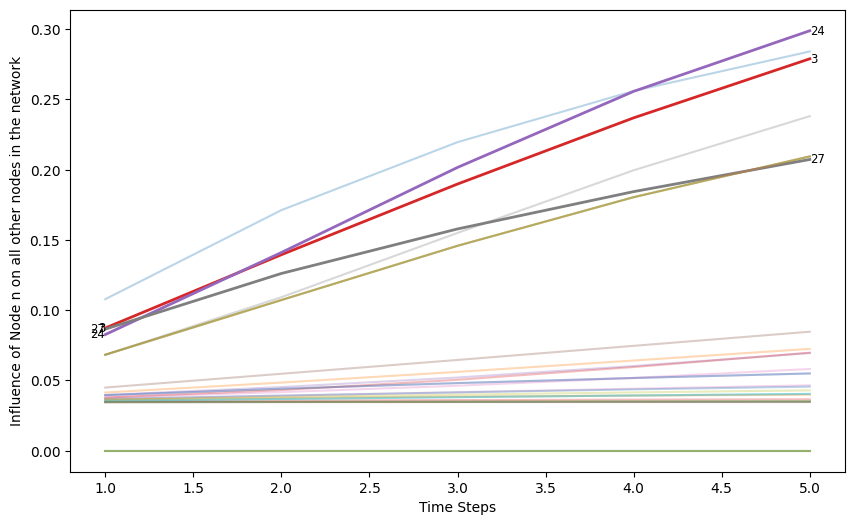

In [35]:

results5 = []

def calculate_normalized_sums(matrix):
    matrix_size = matrix.shape[0]
    row_sums = matrix.sum(axis=1)
    normalized_sums = row_sums / (matrix_size - 4)
    return normalized_sums

results5.append(calculate_normalized_sums(matriz1v4))
results5.append(calculate_normalized_sums(matriz2v4))
results5.append(calculate_normalized_sums(matriz3v4))
results5.append(calculate_normalized_sums(matriz4v4))
results5.append(calculate_normalized_sums(matriz5v4))

results5 = np.array(results5).T

highlight_nodes = [3, 27, 24]

plt.figure(figsize=(10, 6))
for i, row_result in enumerate(results5):
    if i in highlight_nodes:
        plt.plot(range(1, 6), row_result, marker=' ', label=f' {i}', linewidth=2.0)
        plt.text(1, row_result[0], f'{i}', fontsize='small', ha='right', va='center')
        plt.text(5, row_result[-1], f'{i}', fontsize='small', ha='left', va='center')
    else:
        plt.plot(range(1, 6), row_result, marker=' ', alpha=0.3)

plt.xlabel('Time Steps')
plt.ylabel('Influence of Node n on all other nodes in the network')
plt.show()

In [36]:

influence_data2 = {f'Time {t}': [Cs_t5[n][f][Timesteps.index(t)] for n in G.nodes for f in G.nodes] for t in Timesteps}
df2 = pd.DataFrame(influence_data2, index=pd.MultiIndex.from_product([G.nodes, G.nodes], names=['Node', 'Influenced Node']))

df_normalized2 = df2.div(df2.max(axis=0), axis=1)

top_10_influence2 = {t: df_normalized2.groupby('Node')[f'Time {t}'].mean().nlargest(10) for t in Timesteps}

top_10_table2 = pd.DataFrame(top_10_influence2)

print(top_10_table2)

             1         2         3         4         5
Node                                                  
3     0.087328  0.139514  0.189823  0.236933  0.278974
7     0.068248  0.109275  0.155021  0.199611  0.238135
8     0.068323  0.107248  0.145863  0.180462  0.209493
10    0.107877  0.171241  0.219619  0.256087  0.284184
15    0.044958  0.054763  0.064607  0.074652  0.084713
17    0.068323  0.107248  0.145863  0.180462  0.209493
22    0.068323  0.107248  0.145863  0.180462  0.209493
24    0.082675  0.141088  0.201635  0.255782  0.298942
27    0.086533  0.126163  0.157860  0.184427  0.207314
31    0.068323  0.107248  0.145863  0.180462  0.209493


## Eygen value, Betwenness and Clustering Coeficient

In [20]:

edges = [(1, 3), (1, 9), (1, 11), (2, 16), (3, 15), (3, 23), (3, 24), (3, 27),
         (4, 13), (4, 20), (4, 27), (4, 30), (6, 15), (6, 27), (7, 10), (7, 14),
         (7, 16), (7, 24), (8, 10), (8, 17), (8, 22), (8, 31), (9, 1), (10, 7),
         (10, 8), (10, 17), (10, 22), (10, 24), (10, 31), (11, 1), (13, 4),
         (13, 30), (14, 7), (14, 21), (15, 3), (15, 6), (15, 25), (15, 32),
         (16, 2), (16, 7), (17, 8), (17, 10), (17, 22), (17, 31), (19, 27),
         (19, 28), (20, 4), (20, 27), (20, 30), (21, 14), (21, 26), (22, 8),
         (22, 10), (22, 17), (22, 31), (23, 3), (23, 24), (24, 3), (24, 7),
         (24, 10), (24, 23), (25, 15), (26, 21), (27, 3), (27, 4), (27, 6),
         (27, 19), (27, 20), (27, 28), (27, 29), (27, 30), (28, 19), (28, 27),
         (28, 29), (29, 27), (29, 28), (30, 4), (30, 13), (30, 20), (30, 27),
         (31, 8), (31, 10), (31, 17), (31, 22), (32, 15)]

G = nx.Graph()
G.add_edges_from(edges)

Lmax = 5
lamb = 0.5
Timesteps = [1, 2, 3, 4, 5]

clustering = nx.clustering(G)
betweenness = nx.betweenness_centrality(G, normalized=True)

try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = {node: 0 for node in G.nodes}


def normalize(metric):
    max_value = max(metric.values())
    for node in metric:
        if max_value > 0:
            metric[node] /= max_value

normalize(clustering)
normalize(betweenness)
normalize(eigenvector_centrality)

max_node = max(G.nodes)

num_timesteps = len(Timesteps)
Cs_t4 = [[[0.0 for _ in range(num_timesteps)] for _ in range(max_node + 1)] for _ in range(max_node + 1)]

for n in G.nodes:
    Cprev = [[0.0 for _ in range(num_timesteps)] for _ in range(max_node + 1)]

    for L in range(Lmax, -1, -1):
        Ccurr = [[0.0 for _ in range(num_timesteps)] for _ in range(max_node + 1)]


        model_values = []
        for T in Timesteps:
            sum_term = sum((np.exp(-lamb * T) * (lamb * T)**i / np.math.factorial(i)) for i in range(L))
            P_L_T_lambda = 1 - sum_term
            model_values.append(P_L_T_lambda)
            Ccurr[n][Timesteps.index(T)] = P_L_T_lambda

        for f in G.nodes:
            for t in G.neighbors(f):
                w = (clustering[t] + betweenness[t]  + eigenvector_centrality[t]) / 3
                for idx, T in enumerate(Timesteps):
                    v = model_values[idx]
                    if t < len(Cprev) and f < len(Ccurr):
                        Ccurr[f][idx] += w * Cprev[t][idx] - (Ccurr[f][idx] * w * Cprev[t][idx] / v)

        Cprev = [list(row) for row in Ccurr]

    for f in G.nodes:
        for idx, T in enumerate(Timesteps):
            Cs_t4[n][f][idx] = Ccurr[f][idx]

<ipython-input-20-dc2b84413745>:65: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  sum_term = sum((np.exp(-lamb * T) * (lamb * T)**i / np.math.factorial(i)) for i in range(L))


In [21]:

matriz1v3 = np.array(Cs_t4)[:, :, 0]
matriz2v3 = np.array(Cs_t4)[:, :, 1]
matriz3v3 = np.array(Cs_t4)[:, :, 2]
matriz4v3 = np.array(Cs_t4)[:, :, 3]
matriz5v3 = np.array(Cs_t4)[:, :, 4]

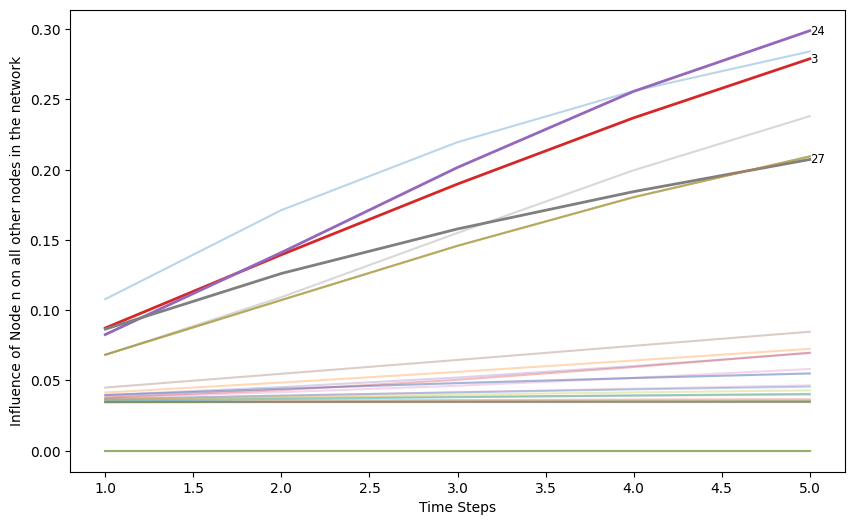

In [22]:

results4 = []
def calculate_normalized_sums(matrix):
    matrix_size = matrix.shape[0]
    row_sums = matrix.sum(axis=1)
    normalized_sums = row_sums / (matrix_size - 4)
    return normalized_sums

results4.append(calculate_normalized_sums(matriz1v3))
results4.append(calculate_normalized_sums(matriz2v3))
results4.append(calculate_normalized_sums(matriz3v3))
results4.append(calculate_normalized_sums(matriz4v3))
results4.append(calculate_normalized_sums(matriz5v3))

results4 = np.array(results4).T
highlight_nodes = [3, 27, 24]

plt.figure(figsize=(10, 6))
for i, row_result in enumerate(results5):
    if i in highlight_nodes:
        plt.plot(range(1, 6), row_result, marker=' ', label=f'Node {i}', linewidth=2.0)
        plt.text(5, row_result[-1], f'{i}', fontsize='small', ha='left', va='center')
    else:
        plt.plot(range(1, 6), row_result, marker=' ', alpha=0.3)

plt.xlabel('Time Steps')
plt.ylabel('Influence of Node n on all other nodes in the network')
#plt.legend(loc='upper right', fontsize='small')
plt.show()

In [23]:

influence_data1 = {f'Time {t}': [Cs_t4[n][f][Timesteps.index(t)] for n in G.nodes for f in G.nodes] for t in Timesteps}
df1 = pd.DataFrame(influence_data1, index=pd.MultiIndex.from_product([G.nodes, G.nodes], names=['Node', 'Influenced Node']))

df_normalized1 = df1.div(df1.max(axis=0), axis=1)

top_10_influence1 = {t: df_normalized1.groupby('Node')[f'Time {t}'].mean().nlargest(10) for t in Timesteps}

top_10_table1 = pd.DataFrame(top_10_influence1)

print(top_10_table1)

             1         2         3         4         5
Node                                                  
3     0.071830  0.109151  0.147283  0.185727  0.222728
7     0.060728  0.094156  0.134990  0.177479  0.214973
8     0.085237  0.138297  0.180662  0.211249  0.233337
10    0.103826  0.166594  0.211721  0.242245  0.263876
17    0.085237  0.138297  0.180662  0.211249  0.233337
20    0.054403  0.074885       NaN       NaN       NaN
22    0.085237  0.138297  0.180662  0.211249  0.233337
23         NaN       NaN  0.095013  0.123765  0.153906
24    0.074375  0.124257  0.180095  0.232640  0.274878
27    0.078524  0.114241  0.143119  0.166800  0.186485
31    0.085237  0.138297  0.180662  0.211249  0.233337
